In [1]:
from datetime import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import boto3

%matplotlib inline

In [2]:
BUCKET = "mlend-capstone"
FILENAME = "patient_noshow.csv" #Data from https://www.kaggle.com/joniarroba/noshowappointments

In [3]:
s3 = boto3.resource('s3')
obj = s3.Object(BUCKET, FILENAME)
body = obj.get()['Body'].read().decode('utf-8')

In [4]:
#Examine the first few lines to determine a good symbol to split on
body[:1000]

'PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show\n29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No\n558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No\n4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No\n867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No\n8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No\n95985133231274,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No\n733688164476661,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes\n3449833394123,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes\n56394729949972,5638447,F,2016-04-29T08:02:16Z,201

In [5]:
contents = body.split('\n')
contents[:5]

['PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show',
 '29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No',
 '558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No',
 '4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No',
 '867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No']

In [6]:
data = pd.DataFrame((row.split(',') for row in contents[1:]), columns=contents[0].split(','))

data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
data.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110523,3596266328735,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,15576631729893,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,92134931435557,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,377511518121127,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No
110527,,None,None,None,None,None,None,None,None,None,None,None,None,None


In [8]:
#We will drop the last row
data = data.drop(index=[110527])
data.tail() #Sanity check

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2572134369293,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3596266328735,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,15576631729893,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,92134931435557,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,377511518121127,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null object
AppointmentID     110527 non-null object
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null object
Neighbourhood     110527 non-null object
Scholarship       110527 non-null object
Hipertension      110527 non-null object
Diabetes          110527 non-null object
Alcoholism        110527 non-null object
Handcap           110527 non-null object
SMS_received      110527 non-null object
No-show           110527 non-null object
dtypes: object(14)
memory usage: 12.6+ MB


In [10]:
#The dataset is remarkably complete. However, the column data types need to be updated
#and some of the names need to be corrected.
rename_map = {'Hipertension': 'Hypertension',
              'Handcap': 'Handicap',
              'No-show': 'NoShow'
             }

data_type_map = {'PatientId': 'str',
                 'AppointmentID': 'str',
                 'Gender': 'category',
                 'ScheduledDay': 'datetime64[ns]',
                 'AppointmentDay': 'datetime64[ns]',
                 'Age': 'int',
                 'Neighbourhood': 'category',
                 'Scholarship': 'category',
                 'Hypertension': 'category',
                 'Diabetes': 'category',
                 'Alcoholism': 'category',
                 'Handicap': 'category',
                 'SMS_received': 'category',
                 'NoShow': 'category'
                }

data = data.rename(columns=rename_map).astype(data_type_map)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null object
AppointmentID     110527 non-null object
Gender            110527 non-null category
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null category
Scholarship       110527 non-null category
Hypertension      110527 non-null category
Diabetes          110527 non-null category
Alcoholism        110527 non-null category
Handicap          110527 non-null category
SMS_received      110527 non-null category
NoShow            110527 non-null category
dtypes: category(9), datetime64[ns](2), int64(1), object(2)
memory usage: 6.0+ MB


In [12]:
#We will visualize the columns to develop a 
#sense for the distributions of the features

viz_cols = list(data.columns)
viz_cols.remove('PatientId')
viz_cols.remove('AppointmentID')
viz_cols.remove('ScheduledDay')
viz_cols.remove('AppointmentDay')
print(len(viz_cols))
print(viz_cols)

10
['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'NoShow']


===	===	Gender	===	===
F	71840	64.998%
M	38687	35.002%


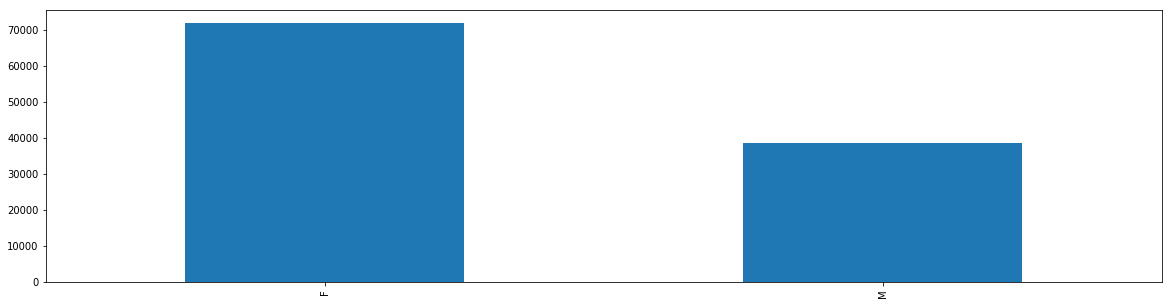

===	===	Age	===	===
count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64


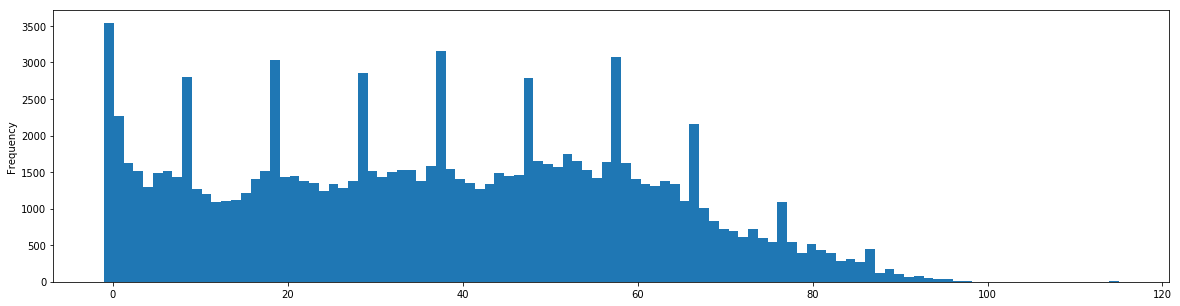

===	===	Neighbourhood	===	===
JARDIM CAMBURI	7717	6.982%
MARIA ORTIZ	5805	5.252%
RESISTÊNCIA	4431	4.009%
JARDIM DA PENHA	3877	3.508%
ITARARÉ	3514	3.179%
CENTRO	3334	3.016%
TABUAZEIRO	3132	2.834%
SANTA MARTHA	3131	2.833%
JESUS DE NAZARETH	2853	2.581%
BONFIM	2773	2.509%
SANTO ANTÔNIO	2746	2.484%
SANTO ANDRÉ	2571	2.326%
CARATOÍRA	2565	2.321%
JABOUR	2509	2.270%
SÃO PEDRO	2448	2.215%
ILHA DO PRÍNCIPE	2266	2.050%
NOVA PALESTINA	2264	2.048%
ANDORINHAS	2262	2.047%
DA PENHA	2217	2.006%
ROMÃO	2215	2.004%
GURIGICA	2018	1.826%
SÃO JOSÉ	1977	1.789%
BELA VISTA	1907	1.725%
MARUÍPE	1902	1.721%
FORTE SÃO JOÃO	1889	1.709%
ILHA DE SANTA MARIA	1885	1.705%
SÃO CRISTÓVÃO	1836	1.661%
REDENÇÃO	1553	1.405%
SÃO BENEDITO	1439	1.302%
JOANA D´ARC	1427	1.291%
CRUZAMENTO	1398	1.265%
CONSOLAÇÃO	1376	1.245%
SANTA TEREZA	1332	1.205%
PRAIA DO SUÁ	1288	1.165%
SANTOS DUMONT	1276	1.154%
ILHA DAS CAIEIRAS	1071	0.969%
GRANDE VITÓRIA	1071	0.969%
INHANGUETÁ	1057	0.956%
PRAIA DO CANTO	1035	0.936%
BENTO FERREIRA	858	0.776%
VILA 

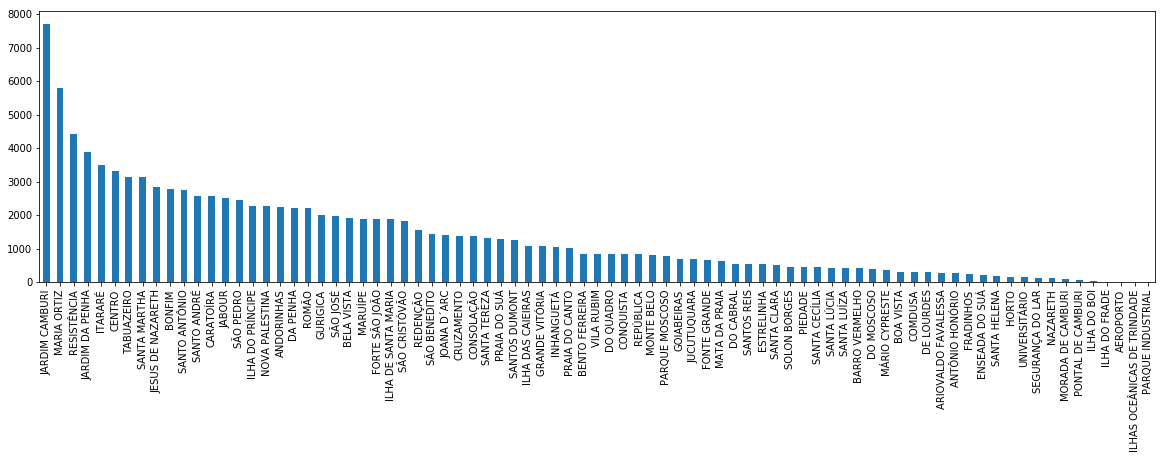

===	===	Scholarship	===	===
0	99666	90.173%
1	10861	9.827%


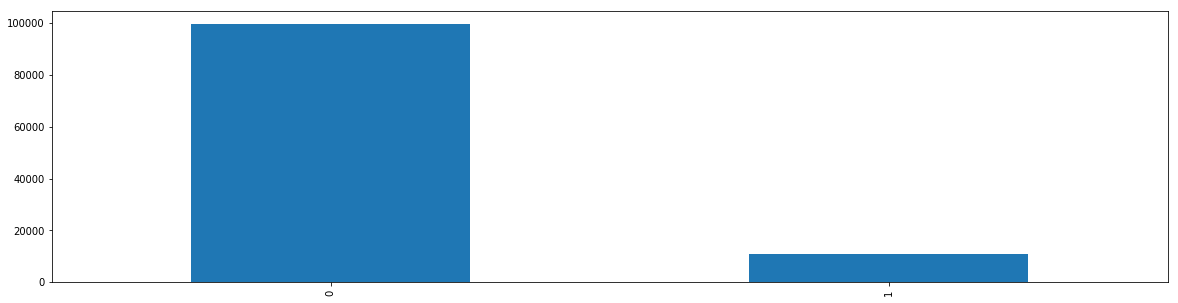

===	===	Hypertension	===	===
0	88726	80.275%
1	21801	19.725%


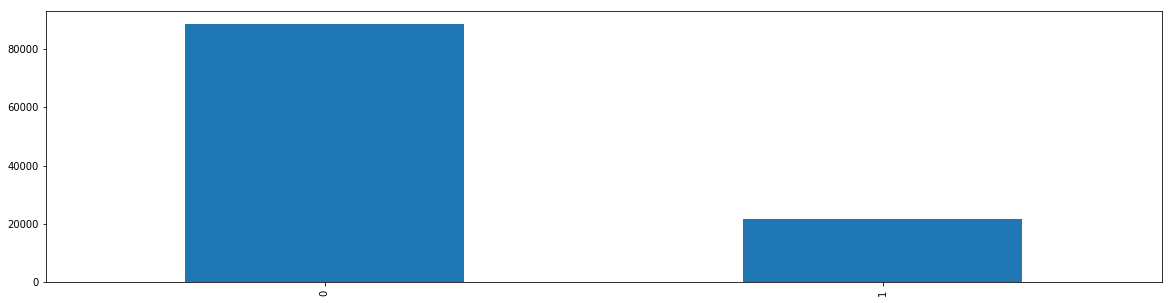

===	===	Diabetes	===	===
0	102584	92.814%
1	7943	7.186%


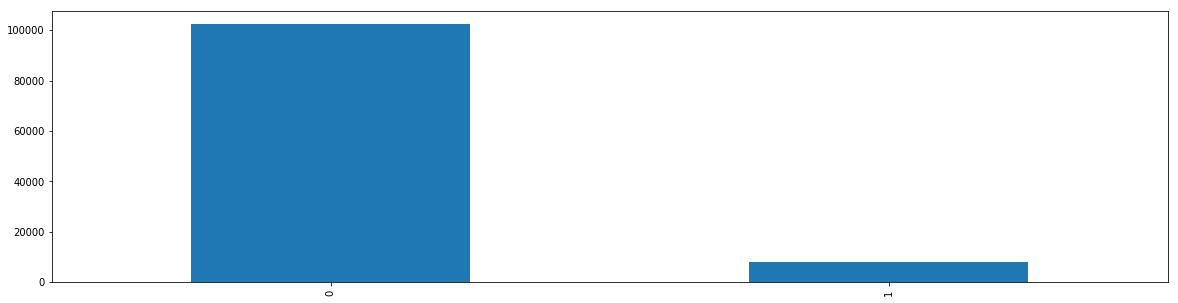

===	===	Alcoholism	===	===
0	107167	96.960%
1	3360	3.040%


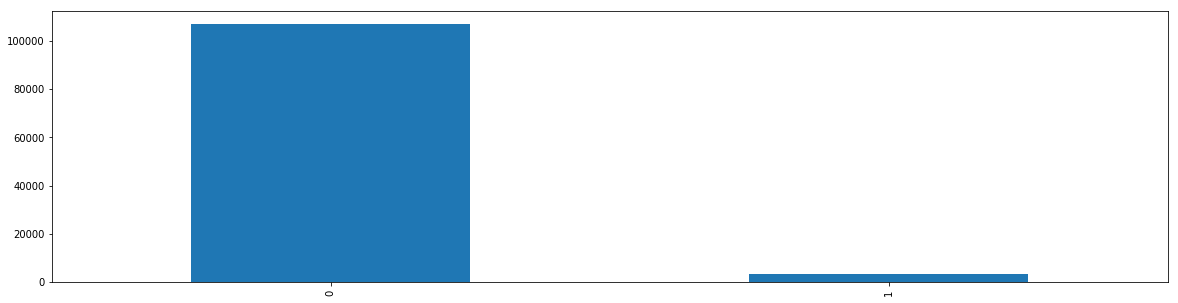

===	===	Handicap	===	===
0	108286	97.972%
1	2042	1.848%
2	183	0.166%
3	13	0.012%
4	3	0.003%


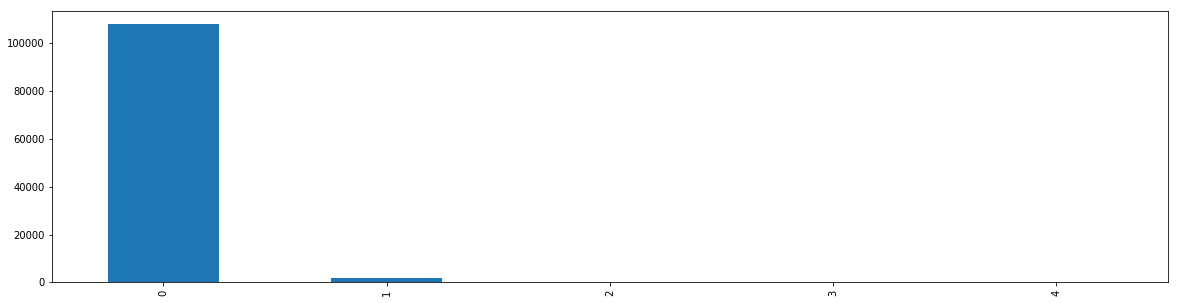

===	===	SMS_received	===	===
0	75045	67.897%
1	35482	32.103%


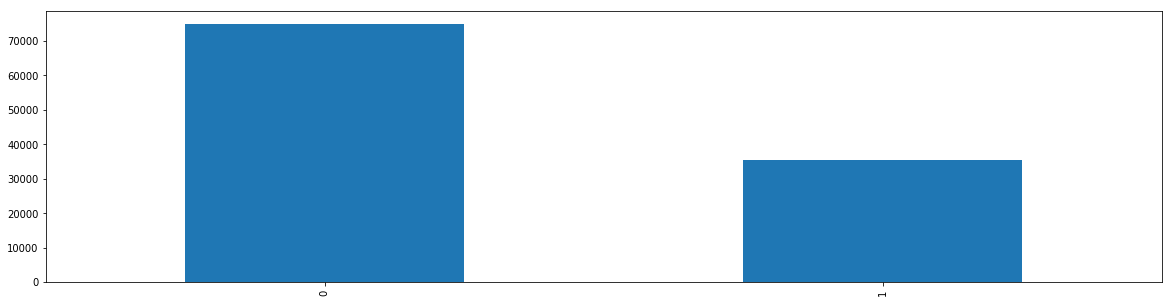

===	===	NoShow	===	===
No	88208	79.807%
Yes	22319	20.193%


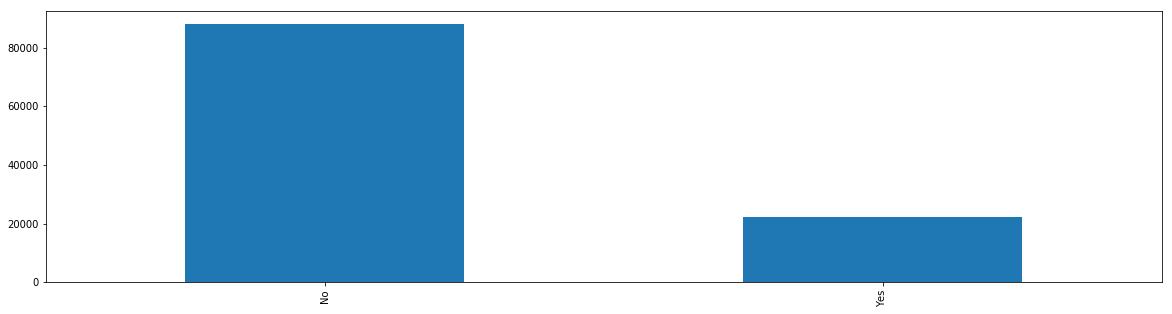

In [13]:
for col in viz_cols:
    col_ = data[col]
    n = len(data)
    print(f"===\t===\t{col_.name}\t===\t===")
    if isinstance(col_.dtype, pd.core.dtypes.dtypes.CategoricalDtype):
        col_.value_counts().plot(kind='bar', figsize=(20,5))
        for i, v in zip(col_.value_counts().index, col_.value_counts()):
            print("{}\t{}\t{:.3%}".format(i,v,v/n))
    else: #Age gets ordered by frequency if the "if" clause is applied
        col_.plot(kind="hist", figsize=(20, 5), bins=len(col_.value_counts()))
        print(col_.describe())
    plt.show()

In [14]:
import scipy.stats as stats
n = len(viz_cols)
corr_matrix = np.zeros(shape=(n,n))

for i, col1 in enumerate(viz_cols):
    for j, col2 in enumerate(viz_cols):
        #Compute Cramer's V for every pair of columns
        #to determine the degree of association between features
        #https://en.wikipedia.org/wiki/Cramér%27s_V
        conf_matrix = pd.crosstab(data[col1], data[col2])
        chi2 = stats.chi2_contingency(conf_matrix)[0]
        m = conf_matrix.sum().sum()
        phi2 = chi2/m
        r, k = conf_matrix.shape
        phi2_corr = max(0, phi2-((k-1)*(r-1))/(m-1))
        r_corr = r-((r-1)**2)/(m-1)
        k_corr = k-((k-1)**2)/(m-1)
        corr_matrix[i,j] = round(np.sqrt(phi2_corr/min(k_corr-1,r_corr-1)),2)

In [15]:
#Remove lower triangle of values for a cleaner plot
corr_matrix = np.triu(corr_matrix, k=0) 
corr_matrix

array([[1.  , 0.2 , 0.05, 0.11, 0.06, 0.03, 0.11, 0.02, 0.05, 0.  ],
       [0.  , 1.  , 0.05, 0.17, 0.53, 0.33, 0.17, 0.07, 0.06, 0.09],
       [0.  , 0.  , 1.  , 0.22, 0.21, 0.12, 0.16, 0.06, 0.09, 0.06],
       [0.  , 0.  , 0.  , 1.  , 0.02, 0.02, 0.03, 0.01, 0.  , 0.03],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.43, 0.09, 0.09, 0.01, 0.04],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.02, 0.06, 0.01, 0.01],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.01, 0.03, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.02, 0.01],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.13],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ]])

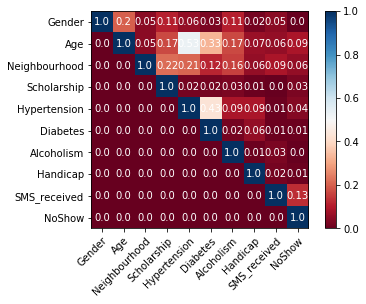

In [16]:
fig, ax = plt.subplots()
im = ax.imshow(corr_matrix, cmap=plt.cm.RdBu)

ax.set_xticks(np.arange(n))
ax.set_yticks(np.arange(n))

ax.set_xticklabels(viz_cols)
ax.set_yticklabels(viz_cols)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(n):
    for j in range(n):
        text = ax.text(j, i, corr_matrix[i, j],
                       ha="center", va="center", color="w")

plt.colorbar(im)
plt.show()

We see that there isn't a particularly strong correlation between any of the feature nor the features and our target (NoShow). In another notebook we will work on feature selection and engineering.

In [17]:
#Save dataset for future use
from io import StringIO

csv_buffer = StringIO()
data.to_csv(csv_buffer, header=True, index=False)
obj = s3.Object(BUCKET, 'preproc_data.csv')
obj.put(Body=csv_buffer.getvalue())

{'ResponseMetadata': {'RequestId': 'C3AA80091BACA2B4',
  'HostId': 'y1Pv16BDYnAFzKwQ/rlwLX7MLHWKk9G0lXRr7O/YXW8J7GWgF6e22F5T0rCgkK1ldMpUskPQqs0=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'y1Pv16BDYnAFzKwQ/rlwLX7MLHWKk9G0lXRr7O/YXW8J7GWgF6e22F5T0rCgkK1ldMpUskPQqs0=',
   'x-amz-request-id': 'C3AA80091BACA2B4',
   'date': 'Thu, 16 Apr 2020 17:41:43 GMT',
   'etag': '"02e91ef8f773d5731ff4b7effde67bb8"',
   'content-length': '0',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'ETag': '"02e91ef8f773d5731ff4b7effde67bb8"'}

In [18]:
#Check that the data was properly saved
from io import BytesIO

obj = boto3.client('s3').get_object(Bucket=BUCKET, Key='preproc_data.csv')
data = pd.read_csv(BytesIO(obj['Body'].read()), index_col=False)

In [19]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29 00:00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29 00:00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29 00:00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29 00:00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29 00:00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
NoShow            110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Some of the columns will need to have their dtypes readjusted, but this is a simple fix.